<a href="https://colab.research.google.com/github/Rocketpuppet/Colab-Projects/blob/main/Carbon_Emission_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [4]:
Countries = []
CarbonEmssions = []
data_list = []


with open('/content/World CO2 Emission Data.csv','r') as data:
    reader = csv.reader(data)
    data_list = list(reader)
    for i, data in enumerate(data_list):
      nums = 0
      if 'CO2 emissions (kt)' in data and data[0] not in Countries:
        Countries.append(data[0])
        for i in data:
            try:
              nums += int(i)
            except:
              pass
        CarbonEmssions.append(nums)

print(len(Countries))
print(len(CarbonEmssions))


266
266


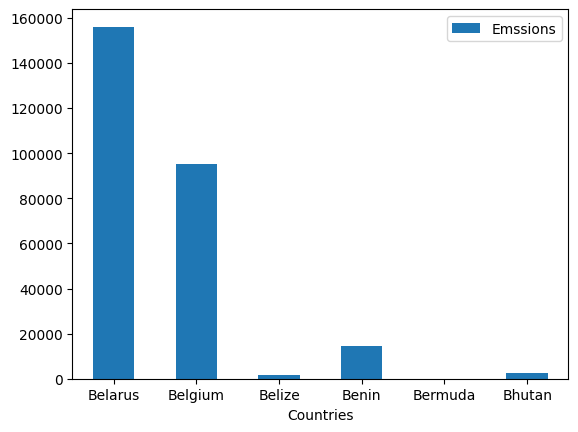

In [5]:
df = pd.DataFrame({'Countries':Countries[17:23], 'Emssions':CarbonEmssions[17:23]})
ax = df.plot.bar(x='Countries', y='Emssions', rot=0)

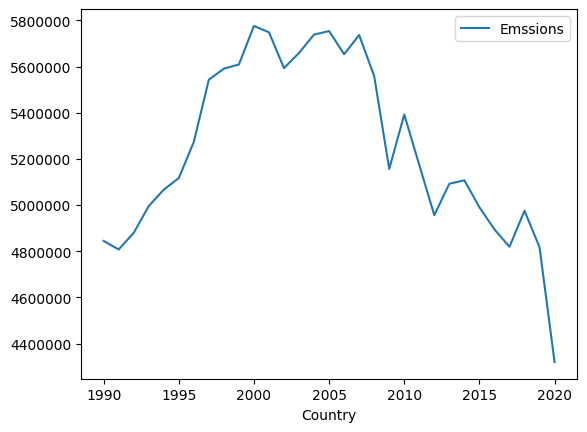

([1990.0,
  1991.0,
  1992.0,
  1993.0,
  1994.0,
  1995.0,
  1996.0,
  1997.0,
  1998.0,
  1999.0,
  2000.0,
  2001.0,
  2002.0,
  2003.0,
  2004.0,
  2005.0,
  2006.0,
  2007.0,
  2008.0,
  2009.0,
  2010.0,
  2011.0,
  2012.0,
  2013.0,
  2014.0,
  2015.0,
  2016.0,
  2017.0,
  2018.0,
  2019.0,
  2020.0],
 [4844517.4,
  4807496.5,
  4879626.1,
  4995209.5,
  5066803.0,
  5117036.9,
  5273486.3,
  5543349.4,
  5590536.3,
  5609017.3,
  5775807.2,
  5748261.8,
  5593024.4,
  5658992.0,
  5738286.0,
  5753493.2,
  5653081.0,
  5736319.3,
  5558378.9,
  5156424.9,
  5392109.4,
  5173591.2,
  4956053.0,
  5092097.2,
  5107208.6,
  4990703.7,
  4894499.2,
  4819365.1,
  4975300.4,
  4817710.4,
  4320532.5])

In [8]:


def sing_country(country, show='yes'):
  years = data_list[0]
  data_points = {}
  x = []
  y = []
  for i in data_list:
      if i[3] == 'EN.ATM.CO2E.KT' and country in i:
          for j, data in enumerate(i):
              try:
                float(i[j])
                yr_int = float(years[j].split()[0])
                if(yr_int not in x):
                    x.append(yr_int)
                    y.append(float(i[j]))
                #print(f'year: {yr_int}, co2: {float(i[j])}')
              except:
                pass
  if show == 'yes':
      df = pd.DataFrame({'Country':x, 'Emssions':y})
      ax = df.plot.line(x='Country', y='Emssions', rot=0).ticklabel_format(style='plain')
      plt.show()
  return (x, y)

sing_country('United States')

-31350.100000000006
-31350.100000000006
-31350.100000000006


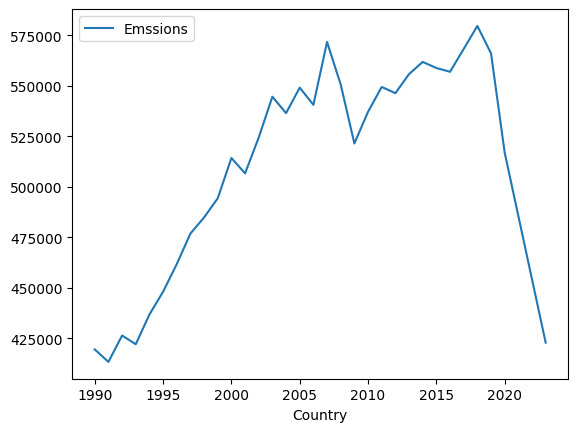

In [10]:
def perdict_country(country):
  x = sing_country(country,'no')[0]
  y = sing_country(country,'no')[1]

  for i in data_list:
      if i[3] == 'EN.ATM.CO2E.KT' and country in i:
          avg_slope = (y[-1] - y[-3]) / (x[-1] - x[-3])
          for i in range(3):
            print(avg_slope)
            x.append(x[-1] + 1)
            y.append(y[-1] + avg_slope)

  df = pd.DataFrame({'Country':x, 'Emssions':y})
  ax = df.plot.line(x='Country', y='Emssions', rot=0).ticklabel_format(style='plain')
  plt.show()


perdict_country('Canada')